In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import scipy.stats as stats
from pandas.tseries.offsets import BDay
import random

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [6]:

prices_df = pd.read_csv('All_Stocks.csv')


In [14]:
prices_df.index = prices_df.iloc[:,0]
prices_df = prices_df.iloc[:,1:]

In [64]:
list_df1 = pd.read_csv('index_list1.csv')
list_df2 = pd.read_csv('index_list2.csv')
list_df = pd.concat([list_df1, list_df2], join = 'inner', axis = 0)
list_df.groupby('index').groups['S5COND']

Int64Index([225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
            238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
            251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
            264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
            277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287],
           dtype='int64')

In [89]:
list_df

,BBG Ticker,Name,index,fsym id
0,CDW US Equity,CDW Corp/DE,S5INFT,RTXD8D-R
1,MXIM US Equity,Maxim Integrated Products Inc,S5INFT,F72PJT-R
2,HPQ US Equity,HP Inc,S5INFT,MS57L1-R
3,IBM US Equity,International Business Machines Corp,S5INFT,SJY281-R
4,APH US Equity,Amphenol Corp,S5INFT,V2H5QG-R
...,...,...,...,...
1377,TATE LN Equity,Tate & Lyle PLC,SXXP,B80DS4-R
1378,SHL GR Equity,Siemens Healthineers AG,SXXP,B4W80H-R
1379,FRE GR Equity,Fresenius SE & Co KGaA,SXXP,B3LWD0-R
1380,MNG LN Equity,M&G PLC,SXXP,B18MVG-R


In [204]:
prices_df

,KRXX4N-R,P8R3C2-R,MH33D6-R,MCNYYL-R,M75WZB-R,KPK586-R,QLGSL2-R,HTM0LK-R,KV0J41-R,CSMTMQ-R,...,N6R7J4-R,R5ZYMX-R,JZKCL0-R,LX3YSB-R,N1TBJ8-R,KCDXY9-R,C36895-R,NPWT6Y-R,N5GP20-R,X9QX47-R
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1/1/1999,NaN,34.671875,0.365513,53.541668,NaN,NaN,NaN,NaN,41.93750,40.71875,...,NaN,20.962967,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/2/1999,NaN,34.671875,0.365513,53.541668,NaN,NaN,NaN,NaN,41.93750,40.71875,...,NaN,20.962967,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/3/1999,NaN,34.671875,0.365513,53.541668,NaN,NaN,NaN,NaN,41.93750,40.71875,...,NaN,20.962967,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/4/1999,NaN,35.250000,0.368304,59.156250,NaN,NaN,NaN,NaN,41.34375,40.31250,...,NaN,21.000000,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/5/1999,NaN,36.625000,0.386719,62.250000,NaN,NaN,NaN,NaN,41.50000,40.62500,...,NaN,21.000000,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/26/2021,35.30,251.490000,126.850000,3265.160000,207.0,618.0,327.66,2380.31,169.07000,142.17000,...,NaN,44.800000,27.82,196.0,5.22,1.625,78.8,0.305,NaN,NaN
05/27/2021,35.25,249.310000,125.280000,3230.110000,208.8,605.5,332.75,2362.68,168.81000,141.69000,...,NaN,45.800000,28.46,195.0,5.28,1.650,80.1,0.305,NaN,NaN
05/28/2021,35.25,249.680000,124.610000,3223.070000,207.4,601.5,328.73,2356.85,169.25000,142.03000,...,NaN,45.600000,27.10,195.0,5.68,1.650,80.5,0.305,NaN,NaN


In [282]:
isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(prices_df.index).map(isBusinessDay)
prices_df = prices_df[match_series]

In [283]:
prices_df

,KRXX4N-R,P8R3C2-R,MH33D6-R,MCNYYL-R,M75WZB-R,KPK586-R,QLGSL2-R,HTM0LK-R,KV0J41-R,CSMTMQ-R,...,N6R7J4-R,R5ZYMX-R,JZKCL0-R,LX3YSB-R,N1TBJ8-R,KCDXY9-R,C36895-R,NPWT6Y-R,N5GP20-R,X9QX47-R
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1/1/1999,NaN,34.671875,0.365513,53.541668,NaN,NaN,NaN,NaN,41.93750,40.71875,...,NaN,20.962967,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/4/1999,NaN,35.250000,0.368304,59.156250,NaN,NaN,NaN,NaN,41.34375,40.31250,...,NaN,21.000000,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/5/1999,NaN,36.625000,0.386719,62.250000,NaN,NaN,NaN,NaN,41.50000,40.62500,...,NaN,21.000000,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/6/1999,NaN,37.812500,0.372768,69.000000,NaN,NaN,NaN,NaN,42.00000,41.31250,...,NaN,21.000000,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1/7/1999,NaN,37.625000,0.401786,79.437500,NaN,NaN,NaN,NaN,41.59375,42.06250,...,NaN,21.500000,NaN,290.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/24/2021,35.35,250.780000,127.100000,3244.990000,205.0,585.5,324.63,2361.04,170.55000,141.76000,...,NaN,44.000000,27.96,185.0,4.68,1.550,77.0,0.305,NaN,NaN
05/25/2021,35.40,251.720000,126.900000,3259.050000,206.0,610.0,327.79,2362.87,170.08000,142.34000,...,NaN,44.000000,27.14,190.0,4.95,1.550,78.5,0.305,NaN,NaN
05/26/2021,35.30,251.490000,126.850000,3265.160000,207.0,618.0,327.66,2380.31,169.07000,142.17000,...,NaN,44.800000,27.82,196.0,5.22,1.625,78.8,0.305,NaN,NaN


In [469]:
%%time
prices_df.index = pd.to_datetime(prices_df.index)

CPU times: user 8.64 ms, sys: 333 µs, total: 8.97 ms
Wall time: 11.2 ms


In [780]:
prices_df[['KRXX4N-R', 'P8R3C2-R']]
index_list2 = list_df.groupby('index').groups['S5COND']
prices_df[list_df.iloc[index_list2]['fsym id']]
index_list2

63

In [785]:
#create a function, given a layered grouping key, go through the column combinations and 
#pick the most correlated and cointegrated pairs
#should return a list of pairs (tuples)

def create_group(list_df, prices_df, key):
#PARAMETERS
# key = 'S5COND'
# ids_df = list_df
# prices_df = prices_df
##########
    index_list = list_df.groupby('index').groups[key]
    group_df = prices_df[list_df.iloc[index_list]['fsym id']]

    return group_df


In [798]:
group1 = create_group(list_df, prices_df, 'S5AIRLX')
# group1 = group1.loc['01/01/2007':]
# cutoff = round(0.7*len(group1.index))
# train = group1[:cutoff]
# test = group1[cutoff:]
group1

,BFSY5M-R,KDJSF0-R,CSFJSZ-R,DGBZCC-R,QKJS7V-R
Unnamed: 0,,,,,
1999-01-01,10.083333,11.062500,NaN,NaN,NaN
1999-01-04,10.194445,10.859375,NaN,NaN,NaN
1999-01-05,10.833333,11.718750,NaN,NaN,NaN
1999-01-06,10.972222,11.968750,NaN,NaN,NaN
1999-01-07,11.333333,12.250000,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-24,60.680000,69.250000,22.99,46.17,56.14
2021-05-25,60.550000,68.250000,23.21,46.67,56.98
2021-05-26,61.210000,69.640000,23.90,47.49,58.01


In [792]:
def group_all_indexes(list_df, prices_df):
    index_group = list_df.groupby(by = list_df['index'])
    index_group_dict = {}
    for k,v in index_group:
        index_group_dict[k] = create_group(list_df, prices_df, k)
    return index_group_dict

In [793]:
%%time
index_df_list = group_all_indexes(list_df, prices_df)

CPU times: user 175 ms, sys: 76.8 ms, total: 252 ms
Wall time: 338 ms


In [797]:
index_df_list['S5AIRLX']

,BFSY5M-R,KDJSF0-R,CSFJSZ-R,DGBZCC-R,QKJS7V-R
Unnamed: 0,,,,,
1999-01-01,10.083333,11.062500,NaN,NaN,NaN
1999-01-04,10.194445,10.859375,NaN,NaN,NaN
1999-01-05,10.833333,11.718750,NaN,NaN,NaN
1999-01-06,10.972222,11.968750,NaN,NaN,NaN
1999-01-07,11.333333,12.250000,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-24,60.680000,69.250000,22.99,46.17,56.14
2021-05-25,60.550000,68.250000,23.21,46.67,56.98
2021-05-26,61.210000,69.640000,23.90,47.49,58.01


In [744]:
train = train.fillna(method = 'ffill').dropna(axis = 'columns')
train

,BRWKF0-R,C1ZH3L-R,F1DFCD-R,WZJV6H-R,MCNYYL-R,QLR4HX-R,PD98GG-R,RJ0FT9-R,VK7479-R,VTBLV9-R,...,MR0PSP-R,K01WHX-R,GRS9LG-R,HWYYQ0-R,VNMTTH-R,GY9L86-R,XLT03X-R,GK0D7G-R,LX2WRB-R,FK99CY-R
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2007-01-01,11.1775,34.174965,33.12,37.526695,39.46,70.052475,40.16,77.66,91.00,44.33,...,10.033334,33.502560,35.969260,97.200005,12.37875,27.440,41.38,120.30021,9.408082,83.50
2007-01-02,11.1775,34.395546,33.12,38.994728,39.46,70.197410,40.16,77.66,92.40,44.33,...,10.033334,33.619293,35.969260,97.400000,12.37875,27.740,41.38,124.61066,9.408082,84.50
2007-01-03,11.4375,35.445210,32.37,39.682873,38.70,70.390656,41.07,79.67,92.60,43.87,...,10.230000,32.498650,36.103577,98.500000,12.20875,27.870,43.48,120.69207,9.267934,84.75
2007-01-04,11.5475,35.293087,31.91,39.874023,38.90,69.134544,40.57,80.63,91.20,43.54,...,10.216667,31.985022,35.772270,99.600000,12.33375,28.460,43.80,117.36128,9.256631,84.75
2007-01-05,11.9975,35.209420,31.94,39.988712,38.37,66.670630,39.79,79.90,91.80,43.54,...,10.676666,32.592037,35.038020,103.400000,12.35375,28.580,43.37,116.96943,9.091617,85.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,75.2300,76.709210,20.44,41.815000,836.52,102.400000,137.48,91.15,87.89,121.79,...,76.890000,76.540000,73.570000,253.500000,53.86000,42.625,87.67,125.73143,13.960000,150.90
2017-01-26,74.9900,76.671190,21.18,41.580000,839.15,101.650000,138.46,90.01,86.78,121.88,...,76.170000,77.070000,73.550000,257.500000,53.65000,42.980,95.64,117.38176,13.660000,153.60
2017-01-27,74.3600,75.849710,21.26,41.500000,835.77,101.700000,138.33,87.97,85.45,122.86,...,74.050000,77.170000,73.560000,263.500000,53.19000,42.390,94.56,114.78769,13.980000,155.10


In [823]:
#finding pairs within a dataframe
def find_pairs(df):
    n = df.shape[1]
    keys = df.keys()
    pairs = []
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    for i in range(0,n):
        for j in range(i+1,n):
            s_df = df[[keys[i], keys[j]]].dropna()
            s1 = s_df[keys[i]]
            s2 = s_df[keys[j]]
            result = coint(s1, s2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
        

In [801]:

score_matrix, pval_matrix, pairs = find_pairs(train)

KeyboardInterrupt: 

In [158]:
score_matrix

array([[ 0.        , -1.82242568, -2.85920677, ..., -1.88763687,
        -2.36329529, -3.19386071],
       [ 0.        ,  0.        , -1.60794898, ...,  0.24507292,
        -1.53385293, -2.29057935],
       [ 0.        ,  0.        ,  0.        , ..., -3.23555599,
        -4.08969705, -4.18591532],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -2.75426239, -2.44963548],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -2.88738385],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [799]:
pval_matrix.min()

6.507190636336022e-05

In [161]:
len(pairs)

264

In [824]:
def find_all_pairs(index_dict):
    pairs = []
    for k in index_dict:
        _,_, pairs_v = find_pairs(index_dict[k])
        pairs += pairs_v
    return pairs


In [ ]:
%%time
all_pairs = find_all_pairs(index_df_list)
all_pairs

In [162]:
list_df[(list_df['fsym id'] == 'HNZVK6-R')& (list_df['index'] == 'S5COND')]


,BBG Ticker,Name,index,fsym id
250,CCL US Equity,Carnival Corp,S5COND,HNZVK6-R


In [163]:
def get_pair_names(tup):
    name1 = list_df[(list_df['fsym id'] == tup[0])]['Name'].values[0]
    name2 = list_df[(list_df['fsym id'] == tup[1])]['Name'].values[0]
    return name1 + ' and ' + name2
names = [get_pair_names(x) for x in pairs]
names

['Tractor Supply Co and EssilorLuxottica SA',
 'Tractor Supply Co and Lennar Corp',
 'Tractor Supply Co and Novozymes A/S',
 'Atos SE and eBay Inc',
 "Atos SE and Domino's Pizza Inc",
 'Atos SE and Pool Corp',
 'Atos SE and Carl Zeiss Meditec AG',
 'Atos SE and Tecan Group AG',
 'Atos SE and DR Horton Inc',
 'PulteGroup Inc and Amazon.com Inc',
 'PulteGroup Inc and Michelin',
 'PulteGroup Inc and Home Depot Inc/The',
 'PulteGroup Inc and Valeo SA',
 'PulteGroup Inc and eBay Inc',
 'PulteGroup Inc and Bayerische Motoren Werke AG',
 'PulteGroup Inc and Hanesbrands Inc',
 'PulteGroup Inc and Volkswagen AG',
 'PulteGroup Inc and Advance Auto Parts Inc',
 'PulteGroup Inc and Daimler AG',
 'PulteGroup Inc and Booking Holdings Inc',
 'PulteGroup Inc and Continental AG',
 'PulteGroup Inc and LKQ Corp',
 'PulteGroup Inc and Siegfried Holding AG',
 'PulteGroup Inc and TJX Cos Inc/The',
 "PulteGroup Inc and Domino's Pizza Inc",
 'PulteGroup Inc and AutoZone Inc',
 'PulteGroup Inc and Novartis AG'

In [164]:
len(pairs)/(114*114 / 2)

0.040627885503231764

In [165]:
pair = pairs[0]
pair

('BRWKF0-R', 'R6Y499-R')

In [500]:
def get_spread(S1, S2, lookback):
    hedge_ratio = S1.rolling(lookback).corr(S2) * S1.rolling(lookback).std() / S2.rolling(lookback).std()
    spread = S1 - hedge_ratio * S2
    return spread, hedge_ratio

In [738]:
def adf_test(timeseries): #[1] is the p-value
    #print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    #dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                           #  'Number of Observations Used'])
    #for key,value in dftest[4].items():
       #dfoutput['Critical Value (%s)'%key] = value
    #print (dfoutput)
    return dftest
    
spread,_ = get_spread(train[pair[0]], train[pair[1]], 60)
adf_test(spread[63:])[1]


1.7532125499389685e-14

In [516]:
%%time 
adf_test(spread.loc["01/01/2013": "12/31/2016"])

CPU times: user 109 ms, sys: 18.7 ms, total: 128 ms
Wall time: 135 ms


(-5.903266973779425,
 2.7460900804063736e-07,
 3,
 1457,
 {'1%': -3.434846127900848,
  '5%': -2.8635257411342616,
  '10%': -2.5678271914441395},
 10814.549993111763)

In [740]:
def filter_pairs_adf_year(pairs, train, lookback = 60):       
    
    def filter_adf(pair):
        spread, hr = get_spread(prices_df[pair[0]], prices_df[pair[1]], lookback)
        spread_group_pvals = spread.groupby(by = spread.index.year).apply(lambda x: adf_test(x.fillna(0))[1])
        average_pval_year = spread_group.fillna(method = 'bfill').mean()
        return average_pval_year < 0.10
    new_pairs = [pair for pair in pairs if filter_adf(pair)]
        
    return new_pairs
        
adf_pairs = filter_pairs_adf_year(pairs, train, 60)

In [741]:
len(adf_pairs)

0

In [729]:
spread, hr = get_spread(prices_df[pair[0]], prices_df[pair[1]], lookback)
spread_group = spread.groupby(by = spread.index.year)
spread_group.apply(lambda x: adf_test(x.fillna(0))[1])

Unnamed: 0
1999         NaN
2000         NaN
2001    0.368006
2002    0.094171
2003    0.136944
2004    0.069552
2005    0.297068
2006    0.004754
2007    0.716477
2008    0.463143
2009    0.000062
2010    0.549870
2011    0.482279
2012    0.126720
2013    0.574245
2014    0.654763
2015    0.134157
2016    0.329279
2017    0.374405
2018    0.345431
2019    0.274383
2020    0.132534
2021    0.192451
dtype: float64

In [ ]:
def filter_pairs_year_coint(pairs):
    for pair in pairs:
        

In [266]:
#def bonferroni_holm_correct(pairs, p_val, n):
#parameters
# pairs = adf_pairs
# p_val = 0.1
# n = 110* (110-1)/2

# new_pairs = []
# count = 0
# for pair in pairs:
#     cint = coint(train[pair[0]],train[pair[1]])
#     pair_p_val = cint[1]
#     if pair_p_val < p_val/(n-count):
#         new_pairs.append((pair, p_val))
#     count += 1
# new_pairs

# #super_coint_pairs = filter_pairs_coint(adf_pairs, train)
# super_coint_pairs

[]

In [187]:
len(super_coint_pairs)

148

In [195]:
pair2 = super_coint_pairs[0]

In [659]:
def run_pairs_strategy(name1, name2, prices_df, start_date, end_date, lookback, enter_width, exit_width):
#PARAMETERS
# S1 = prices_df[pair2[0]]
# S2 = prices_df[pair2[1]]
# name1 = S1.name
# name2 = S2.name
# start_date = '01/01/2005'
# end_date = '12/31/2012'
# lookback = 90
# width = 2
#############
    S1 = prices_df[name1]
    S2 = prices_df[name2]
    
    hr_lookback = 3
    num_trading_days = 21
    
    s_df = pd.concat([S1, S2], axis = 1, join = 'outer')
   # s_df.index = pd.to_datetime(s_df.index)
    
    s_df['Raw Spread'], s_df['Hedge Ratio'] = get_spread(np.log(s_df[name1]), np.log(s_df[name2]), hr_lookback * num_trading_days)
    
    s_df['Z-Score'] = (s_df['Raw Spread'] - s_df['Raw Spread'].rolling(lookback).mean()) / s_df['Raw Spread'].rolling(lookback).std()
#     rolling_z = s_df['Z-Score'].rolling(lookback).mean()
#     width_adj = s_df['Z-Score'].rolling(lookback).std() * width
#     s_df['Upper Band'] = np.array(rolling_z) + np.array(width_adj)
#     s_df['Lower Band'] = rolling_z - width_adj
    s_df['Upper Band'] = enter_width
    s_df['Lower Band'] = -1 * enter_width
    
    s_df = s_df.loc[start_date:end_date]
#     rolling_z = rolling_z.loc[start_date:end_date]
    
    s_df['Sell Position'] = np.where(s_df['Z-Score'] > enter_width, -1, 
                  np.where(s_df['Z-Score'] < exit_width, 0, np.nan))
    s_df['Sell Position'] = s_df['Sell Position'].ffill().fillna(0)
    
    s_df['Buy Position'] = np.where(s_df['Z-Score'] < -1 * enter_width, 1, 
                      np.where(s_df['Z-Score'] > -1 * exit_width, 0, np.nan))
    s_df['Buy Position'] = s_df['Buy Position'].ffill().fillna(0)
    
    

    s_df[name1 + '|Position'] = 100* (s_df['Buy Position'] + s_df['Sell Position'])
    s_df[name2 + '|Position'] =  -s_df[name1 + '|Position'] * s_df['Hedge Ratio']

    
    
    s_df[name1+"|P&L"] =  s_df[name1 + '|Position'] * s_df[name1].diff().shift(-1)
    s_df[name2+"|P&L"] =  s_df[name2 + '|Position'] * s_df[name2].diff().shift(-1)
    s_df['Total P&L'] = s_df[name1+'|P&L'] + s_df[name2+'|P&L']
    s_df['Cumulative P&L'] = s_df['Total P&L'].cumsum()

    return s_df






In [660]:
%%time
pair2_df= run_pairs_strategy(pair2[0], pair2[1], prices_df, "01/01/2010", "12/31/2017", 63, 1.7, 1.5)
pair2_df


CPU times: user 50.5 ms, sys: 38.2 ms, total: 88.7 ms
Wall time: 125 ms


,BRWKF0-R,FH1NKL-R,Raw Spread,Hedge Ratio,Z-Score,Upper Band,Lower Band,Sell Position,Buy Position,BRWKF0-R|Position,FH1NKL-R|Position,BRWKF0-R|P&L,FH1NKL-R|P&L,Total P&L,Cumulative P&L
Unnamed: 0,,,,,,,,,,,,,,,
2010-01-01,13.2425,12.552326,2.519358,0.025326,1.465045,1.7,-1.7,0.0,0.0,0.0,-0.000000,0.00,-0.000000,0.000000,0.000000
2010-01-04,13.3350,12.788236,2.538807,0.020241,1.579270,1.7,-1.7,0.0,0.0,0.0,-0.000000,-0.00,-0.000000,-0.000000,0.000000
2010-01-05,13.1950,13.319031,2.559350,0.007913,1.706338,1.7,-1.7,-1.0,0.0,-100.0,0.791270,2.75,0.116667,2.866667,2.866667
2010-01-06,13.1675,13.466474,2.586597,-0.003402,1.869555,1.7,-1.7,-1.0,0.0,-100.0,-0.340177,-18.00,-0.588506,-18.588506,-15.721838
2010-01-07,13.3475,15.196473,2.558165,0.012188,1.678977,1.7,-1.7,-1.0,0.0,-100.0,1.218807,0.75,0.587036,1.337036,-14.384802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,74.4800,64.000000,0.246573,0.977175,-1.729201,1.7,-1.7,0.0,1.0,100.0,-97.717523,82.00,10.748928,92.748928,-1728.978446
2017-12-26,75.3000,63.890000,-0.191189,1.085517,-1.912301,1.7,-1.7,0.0,1.0,100.0,-108.551659,-42.00,-3.256550,-45.256550,-1774.234995
2017-12-27,74.8800,63.920000,-0.625100,1.188414,-2.115330,1.7,-1.7,0.0,1.0,100.0,-118.841365,20.00,11.884137,31.884137,-1742.350859


In [661]:
%%time
pair2_group = pair2_df.groupby(by=[pair2_df.index.year, pair2_df.index.month])
sharpes_group = pair2_group.apply(lambda x: get_sharpe(x['Total P&L']))
#{str(k[1]) + '/' + str(k[0]):v for k,v in sharpes_group.items()}
#pair2_group.get_group((2010,2))

CPU times: user 33.2 ms, sys: 9.35 ms, total: 42.5 ms
Wall time: 48.8 ms


In [662]:
def get_sharpe(r, rfr=0.02):
    if r.std():
        return (r.mean()-rfr) / r.std() * np.sqrt(252)
    return 0


In [663]:
get_sharpe(pair2_df['Total P&L'])

-0.21809930345530515

In [695]:
def train_sharpes(pair, interval):
    sharpes = []
    lookbacks = [x * 5 for x in range(1, 52)]
    widths = [x*0.05 + 0.5 for x in range(1,45)]
    for l in lookbacks:
        for w in widths:
            exit_width = random.uniform(0,w)
            s_df= run_pairs_strategy(pair[0], pair[1], prices_df, interval[0], interval[1], l, w, exit_width)
            sharpe = get_sharpe(s_df['Total P&L'])
            net_return = s_df['Total P&L'].sum()
            volatility = s_df['Total P&L'].std()
            d = {"Lookback": l,
                 "Enter Width": w,
                 "Exit Width": exit_width,
                 "Sharpe": sharpe,
                 "Net Return": net_return,
                 "Net Volatility": volatility}
            
#             dates_dict = {}
            s_df_group = s_df.groupby(by=[s_df.index.year, s_df.index.month])
            sharpes_group = s_df_group.apply(lambda x: get_sharpe(x['Total P&L']))
#             dates_dict = {str(k[1]) + '/' + str(k[0]):v for k,v in sharpes_group.items()}
            
            d['Monthly Sharpes'] = sharpes_group
            sharpes.append(d)
    return sorted(sharpes, key = lambda x: -x['Sharpe'])

In [669]:
#using random parameter optimization (faster)
def train_sharpes_random(pair, interval):
    sharpes = []
    lookbacks = [random.randint(1,250) for _ in range(500)]
    widths = [random.uniform(0.5,2.0) for _ in range(500)]
    for i in range(500):
        lb = lookbacks[i]
        enter_wth = widths[i]
        exit_wth = random.uniform(0,enter_wth)
        
        s_df= run_pairs_strategy(pair[0], pair[1], prices_df, interval[0], interval[1], lb, enter_wth, exit_wth)
        sharpe = get_sharpe(s_df['Total P&L'])
        net_return = s_df['Total P&L'].sum()
        volatility = s_df['Total P&L'].std()
        d = {"Lookback": lb,
             "Enter Width": enter_wth,
             "Exit Width": exit_wth,
             "Sharpe": sharpe,
             "Net Return": net_return,
             "Net Volatility": volatility}

#             dates_dict = {}
        s_df_group = s_df.groupby(by=[s_df.index.year, s_df.index.month])
        sharpes_group = s_df_group.apply(lambda x: get_sharpe(x['Total P&L']))
#             dates_dict = {str(k[1]) + '/' + str(k[0]):v for k,v in sharpes_group.items()}

        d['Monthly Sharpes'] = sharpes_group
        sharpes.append(d)
    return sorted(sharpes, key = lambda x: -x['Sharpe'])

In [696]:
%%time
sharpes2 = train_sharpes(pair2, ("01/01/1999", "12/31/2010"))

CPU times: user 3min 57s, sys: 11.8 s, total: 4min 9s
Wall time: 7min 42s


In [697]:
sharpes2

[{'Lookback': 20,
  'Enter Width': 2.05,
  'Exit Width': 2.0225104919923886,
  'Sharpe': 0.4623917607959946,
  'Net Return': 2036.8890431315751,
  'Net Volatility': 22.106411350391628,
  'Monthly Sharpes': Unnamed: 0  Unnamed: 0
  1999        1                  NaN
              2                  NaN
              3             0.000000
              4             0.000000
              5            -2.300861
                              ...   
  2010        8            -0.107583
              9            -4.431479
              10            0.000000
              11            2.226771
              12           -3.554302
  Length: 144, dtype: float64},
 {'Lookback': 10,
  'Enter Width': 2.1500000000000004,
  'Exit Width': 1.5281835117794798,
  'Sharpe': 0.4529043034986597,
  'Net Return': 1713.7971508458327,
  'Net Volatility': 18.8783232501539,
  'Monthly Sharpes': Unnamed: 0  Unnamed: 0
  1999        1                  NaN
              2                  NaN
              3  

In [672]:
max(sharpes2, key = lambda x: x['Sharpe'])['Lookback']

8

<AxesSubplot:xlabel='Width', ylabel='Lookback'>

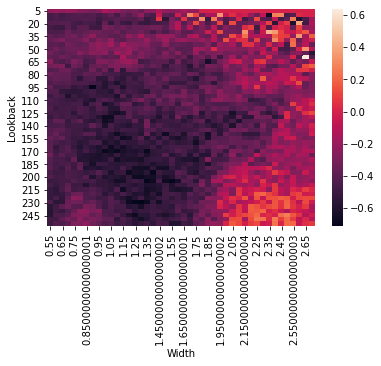

In [691]:
sharpes_map2 = pd.DataFrame(sharpes2).pivot(index = "Lookback", columns = "Width", values = "Sharpe")

import seaborn as sb

sb.heatmap(sharpes_map2)

In [698]:
rand_sharpes2 = pd.DataFrame(sharpes2)
rand_sharpes2

,Lookback,Enter Width,Exit Width,Sharpe,Net Return,Net Volatility,Monthly Sharpes
0,20,2.05,2.022510,0.462392,2036.889043,22.106411,Unnamed: 0 Unnamed: 0 1999 1 ...
1,10,2.15,1.528184,0.452904,1713.797151,18.878323,Unnamed: 0 Unnamed: 0 1999 1 ...
2,15,2.65,1.980955,0.450790,1013.756720,10.931720,Unnamed: 0 Unnamed: 0 1999 1 ...
3,15,2.70,1.816185,0.411778,868.539463,10.142669,Unnamed: 0 Unnamed: 0 1999 1 ...
4,75,2.70,2.686284,0.406411,1134.605650,13.664014,Unnamed: 0 Unnamed: 0 1999 1 ...
...,...,...,...,...,...,...,...
2239,200,1.50,0.101222,-0.681235,-5028.579902,38.659913,Unnamed: 0 Unnamed: 0 1999 1 ...
2240,180,1.00,0.044413,-0.691459,-5739.499916,43.408111,Unnamed: 0 Unnamed: 0 1999 1 ...
2241,240,1.35,0.278021,-0.697707,-5070.850746,38.060673,Unnamed: 0 Unnamed: 0 1999 1 ...
2242,210,1.35,0.151726,-0.704603,-5305.433122,39.410801,Unnamed: 0 Unnamed: 0 1999 1 ...


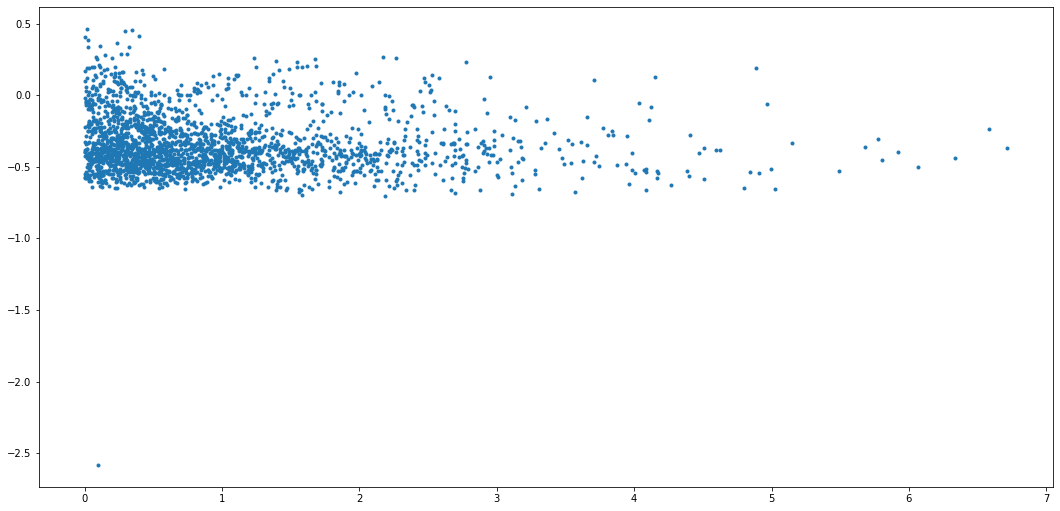

In [707]:
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(321)

ax1.plot(np.log(rand_sharpes2['Enter Width']) - np.log(rand_sharpes2['Exit Width']), rand_sharpes2['Sharpe'], '.')
plt.show()

In [529]:
def test_sharpes(pair, interval, sharpes_list):
    training_parameters = sharpes_list
    testing_parameters = {}
    for p in training_parameters:
        lookback = p['Lookback']
        width = p['Width']
        s_df = run_pairs_strategy(pair[0], pair[1], prices_df, interval[0], interval[1] , lookback, width )
        sharpe = get_sharpe(s_df['Total P&L'])
        net_return = s_df['Total P&L'].sum()
        volatility = s_df['Total P&L'].std()
        d = {"Lookback": lookback,
             "Width": width,
             "Sharpe": sharpe,
             "Net Return": net_return,
             "Net Volatility": volatility}

#             dates_dict = {}
        s_df_group = s_df.groupby(by=[s_df.index.year, s_df.index.month])
        sharpes_group = s_df_group.apply(lambda x: get_sharpe(x['Total P&L']))
#             dates_dict = {str(k[1]) + '/' + str(k[0]):v for k,v in sharpes_group.items()}

        d['Monthly Sharpes'] = sharpes_group
        testing_parameters[(lookback, width)] = d
    return testing_parameters

In [538]:
%%time
test_sharpes2 = test_sharpes(pair2, ("01/01/2018", "12/31/2020"), sharpes2)

CPU times: user 2min 33s, sys: 6.11 s, total: 2min 39s
Wall time: 3min 36s


In [544]:
[v['Net Volatility'] for k, v in test_sharpes2.items()]

[0.18679320427259216,
 0.18679320427259216,
 0.22043694948985193,
 0.41163120247149615,
 0.22043694948985193,
 0.23310667903854762,
 0.5580684332024686,
 0.7364566070857504,
 0.5772125548332319,
 1.0155703711372643,
 0.587775871604872,
 0.6288118148190881,
 1.363895065954888,
 1.2013281319693496,
 0.6852032732288414,
 1.0214533090791493,
 1.0441314375142934,
 0.6509171860183207,
 1.012935714319926,
 1.0411666074837511,
 1.7320763736432316,
 1.56387583202656,
 0.7908240248431265,
 1.2588624909704749,
 1.3634769043711759,
 1.2493348442016967,
 1.2649110069521898,
 1.2648253903240754,
 1.2569436216733414,
 1.364319357483607,
 1.2372720135176123,
 1.6248486216445768,
 1.5870938078352206,
 1.7010955966503085,
 1.648937614335043,
 1.7323834700265082,
 1.6230206555451496,
 1.7390767286431676,
 1.3892264645856394,
 1.6431568918483057,
 1.6469904888408107,
 1.3952484073268565,
 1.5103771733141378,
 0.8413299133846158,
 1.23214217448309,
 1.7425956176286823,
 1.7786914785554941,
 1.6300735541220

In [547]:
def rolling_backtest(pair, price_df):
    intervals = [("01/01/" + str(x), "12/31/"+str(x+10), "01/01/"+str(x+11), "12/31/"+str(x+14)) for x in range(1999,2006)]
    testing_info = []
    for interval in intervals:
        trained_sharpes = train_sharpes(pair, (interval[0], interval[1]))
        tested_sharpes = test_sharpes(pair, (interval[2], interval[3]), trained_sharpes)
        
        average_training_volatility = np.array([x['Net Volatility'] for x in trained_sharpes]).mean()
        average_testing_volatility = np.array([v['Net Volatility'] for k,v in tested_sharpes.items()]).mean()

        train_sharpes_only = np.array([x['Sharpe'] for x in trained_sharpes])
        test_sharpes_only = np.array([v['Sharpe'] for k,v in tested_sharpes.items()])

        avg_best_15_train_sharpe = train_sharpes_only[:15].mean()
        avg_best_15_train_returns = np.array([x['Net Return'] for x in trained_sharpes])[:15].mean()
        avg_best_15_test_sharpe = test_sharpes_only[-15:].sum()/15
        avg_best_15_test_returns = np.array([v['Net Return'] for k,v in tested_sharpes.items()])[:15].mean()
        
        best_performance = max(trained_sharpes, key = lambda x: x['Sharpe'])
        best_training_lookback = best_performance['Lookback']
        best_training_width = best_performance['Width']
        best_test_performance = tested_sharpes[(best_training_lookback, best_training_width)]

#         weighted_sharpes = 0.3*train_sharpes_only + 0.7*test_sharpes_only

#         max_weighted_sharpe = max(weighted_sharpes)

        testing_info.append({"Train Start": interval[0],
                             "Train End": interval[1],
                             "Test Start": interval[2],
                             "Test End": interval[3],
                             "Average Training Volatility": average_training_volatility,
                             "Average Testing Volatility": average_testing_volatility,
                             "Average 15 Best Training Sharpe": avg_best_15_train_sharpe,
                             "Average 15 Best Training Returns": avg_best_15_train_returns,
                             "Average 15 Best Testing Sharpe": avg_best_15_test_sharpe,
                             "Average 15 Best Testing Returns": avg_best_15_test_returns,
                             "Mean Squared Error ":((train_sharpes_only - test_sharpes_only)**2).mean(),
                             "Best* Lookback (Sharpe)": best_training_lookback,
                             "Best* Width (Sharpe)": best_training_width,
                             "Best* Training Sharpe (Sharpe)": best_performance['Sharpe'],
                             "Best* Return (Sharpe)":  best_performance['Net Return'],
                             "Best* Volatility (Sharpe)": best_performance['Net Volatility'],
                             "Best* Monthly Sharpes": best_performance['Monthly Sharpes'],
                             "Test Sharpe (Sharpe)": best_test_performance['Sharpe'],
                             "Test Return (Sharpe)": best_test_performance['Net Return'],
                             "Test Volatility (Sharpe)": best_test_performance['Net Volatility'],
                             "Test Monthly Sharpes (Sharpe)": best_test_performance['Monthly Sharpes']})
    return pd.DataFrame(testing_info)
    
    

In [548]:
%%time
info = rolling_backtest(pair2, prices_df)
info

CPU times: user 34min 37s, sys: 1min 15s, total: 35min 53s
Wall time: 42min 43s


,Train Start,Train End,Test Start,Test End,Average Training Volatility,Average Testing Volatility,Average 15 Best Training Sharpe,Average 15 Best Training Returns,Average 15 Best Testing Sharpe,Average 15 Best Testing Returns,...,Best* Lookback (Sharpe),Best* Width (Sharpe),Best* Training Sharpe (Sharpe),Best* Return (Sharpe),Best* Volatility (Sharpe),Best* Monthly Sharpes,Test Sharpe (Sharpe),Test Return (Sharpe),Test Volatility (Sharpe),Test Monthly Sharpes (Sharpe)
0,01/01/1999,12/31/2009,01/01/2010,12/31/2013,0.382624,0.525633,0.000000,0.000000,-2.178887,0.000000,...,5,1.8,0.00000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 1999 1 ...,0.000000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2010 1 ...
1,01/01/2000,12/31/2010,01/01/2011,12/31/2014,0.386109,0.609490,0.000000,0.000000,-1.980095,0.000000,...,5,1.8,0.00000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2000 1 ...,0.000000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2011 1 ...
2,01/01/2001,12/31/2011,01/01/2012,12/31/2015,0.397913,0.695682,0.000000,0.000000,-1.369128,0.000000,...,5,1.8,0.00000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2001 1 ...,0.000000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2012 1 ...
3,01/01/2002,12/31/2012,01/01/2013,12/31/2016,0.440582,0.797810,0.000000,0.000000,-1.327073,0.000000,...,5,1.8,0.00000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2002 1 ...,0.000000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2013 1 ...
4,01/01/2003,12/31/2013,01/01/2014,12/31/2017,0.464689,0.841251,0.000000,0.000000,-1.809001,0.000000,...,5,1.8,0.00000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2003 1 ...,0.000000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2014 1 ...
5,01/01/2004,12/31/2014,01/01/2015,12/31/2018,0.489635,0.984398,0.000000,0.000000,-1.084767,0.000000,...,5,1.8,0.00000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2004 1 ...,0.000000,0.000000,0.00000,Unnamed: 0 Unnamed: 0 2015 1 ...
6,01/01/2005,12/31/2015,01/01/2016,12/31/2019,0.537673,1.094182,0.008184,24.012821,-1.149617,-12.369078,...,15,0.9,0.04059,62.675377,0.72483,Unnamed: 0 Unnamed: 0 2005 1 ...,-0.666415,-34.889471,1.27401,Unnamed: 0 Unnamed: 0 2016 1 ...


In [568]:
info.iloc[:, 10:]['Test Monthly Sharpes (Sharpe)'].iloc[6].reset_index(drop = True)

0    -1.678941
1     5.142894
2     3.037870
3    -5.193451
4    -3.152858
5    -2.158856
6     1.349344
7     1.819886
8    -2.115033
9     0.933108
10   -4.704767
11    0.860893
12    2.091713
13   -2.116667
14   -2.001182
15   -6.526768
16   -5.871954
17    3.848868
18   -2.610870
19   -4.187212
20    3.104867
21    0.615353
22    4.018783
23   -3.467098
24   -0.826206
25    1.051994
26   -2.150513
27   -3.773754
28    3.285183
29    0.850160
30   -2.566890
31   -4.881869
32   -1.324694
33   -3.892297
34   -0.178682
35   -0.967100
36    0.014586
37   -1.421923
38   -1.293658
39    4.534858
40   -3.461821
41   -1.804812
42   -1.096077
43   -1.657324
44    3.458253
45    3.806010
46   -2.371227
47    3.479210
dtype: float64

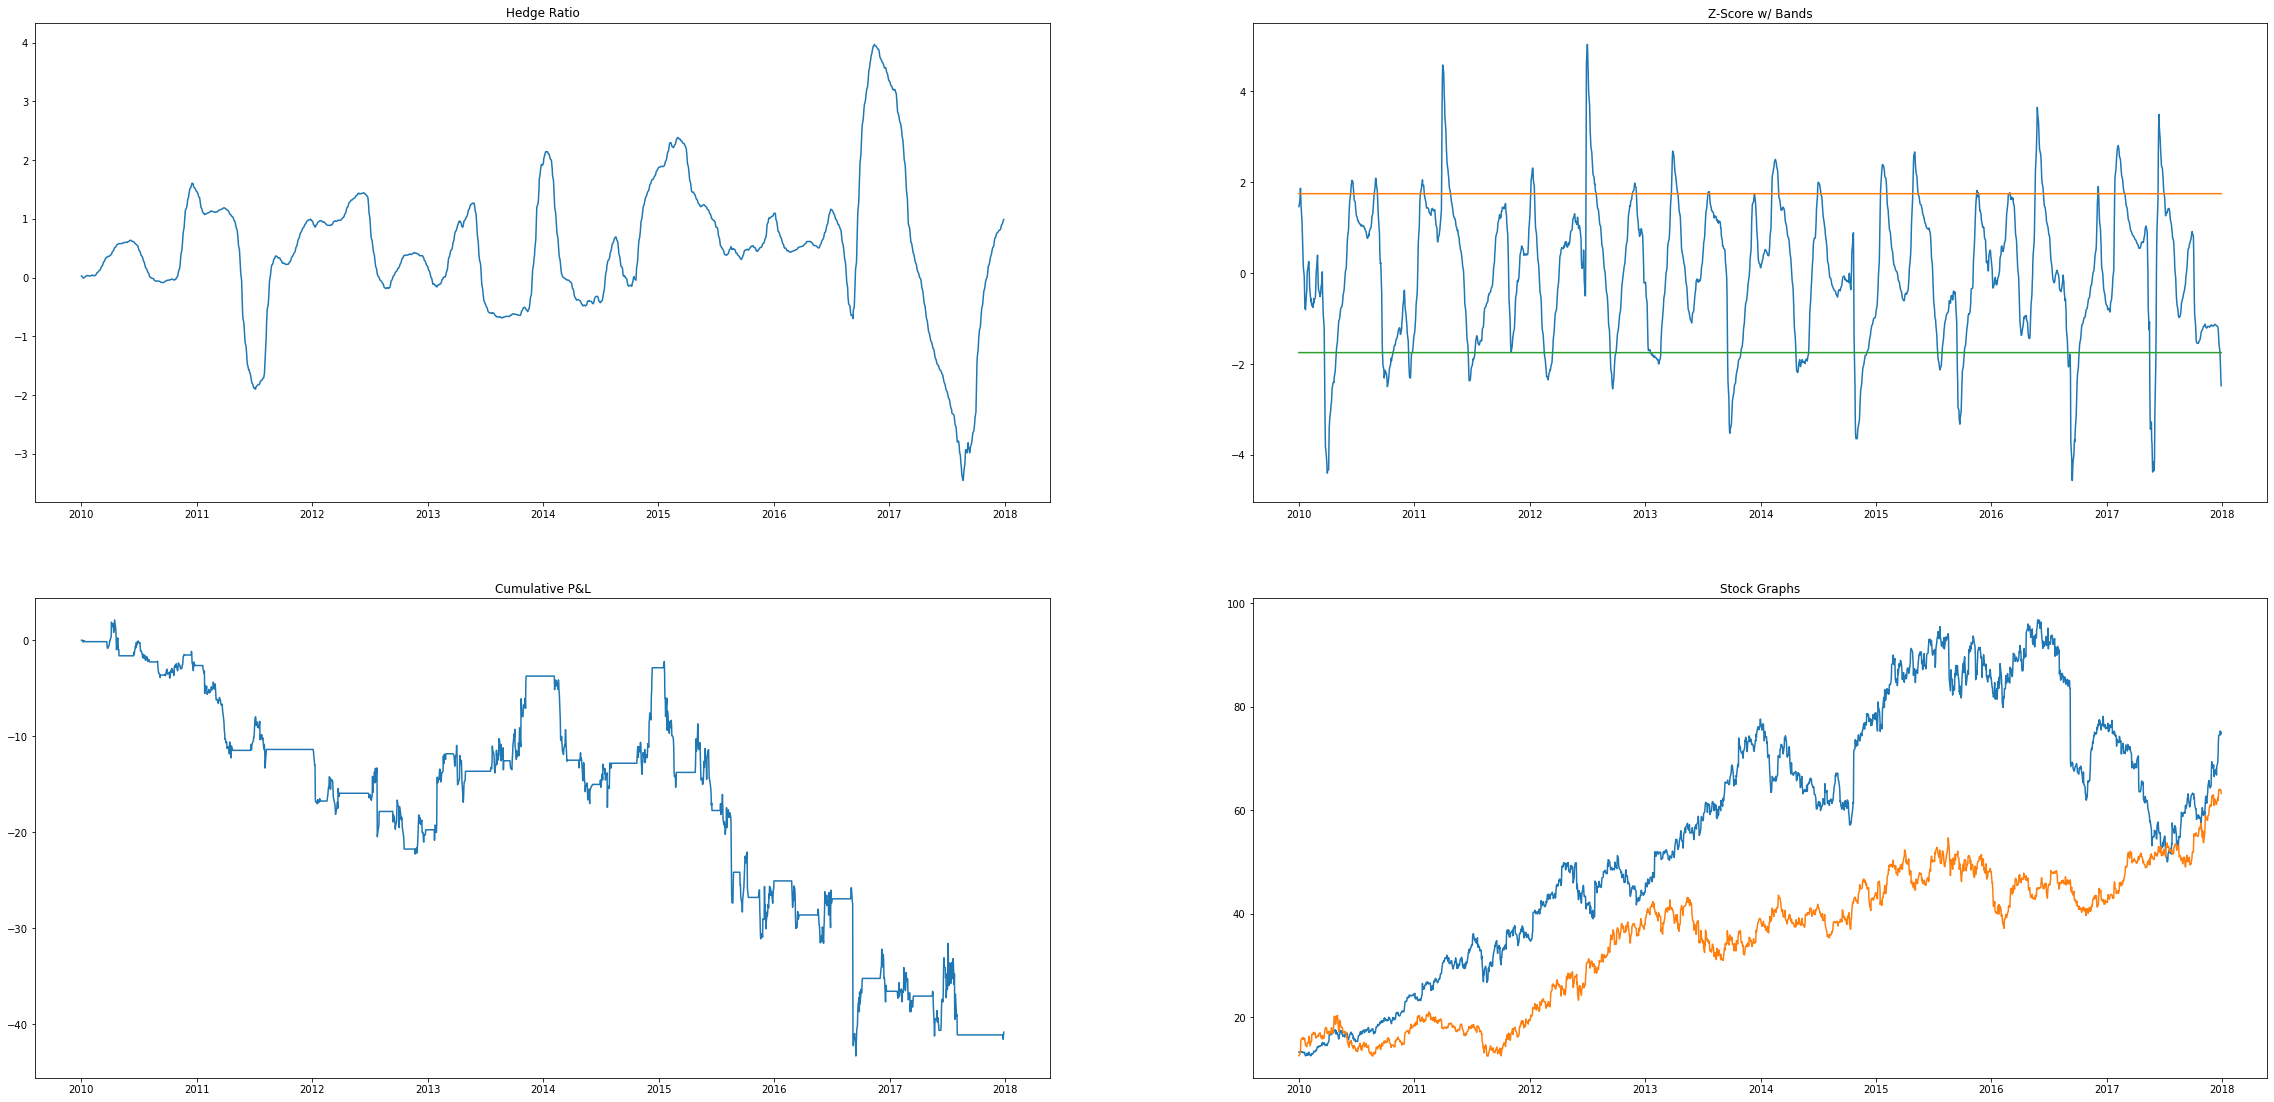

In [579]:
fig = plt.figure(figsize=(40,30)) #overall plot size
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)

ax1.plot(hedge_ratio)
ax1.set_title("Hedge Ratio")

ax2.set_title("Z-Score w/ Bands")
ax2.plot(pair2_df['Z-Score'], label = 'Spread')

ax2.plot(pair2_df['Upper Band'], label = 'Spread')
ax2.plot(pair2_df['Lower Band'], label = 'Spread')

ax3.set_title("Cumulative P&L")
ax3.plot(pair2_df['Cumulative P&L'])

ax4.set_title("Stock Graphs")
ax4.plot(pair2_df['BRWKF0-R'], label = "S1")
ax4.plot(pair2_df['FH1NKL-R'], label = "S2")






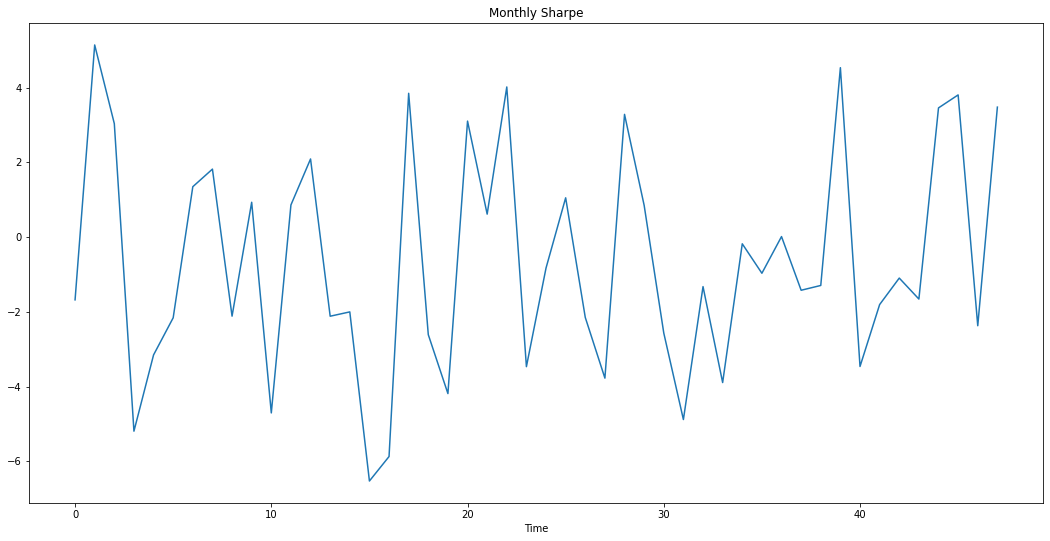

In [574]:
fig = plt.figure(figsize=(40,30))
ax5 = fig.add_subplot(325)


ax5.set_title("Monthly Sharpe")
ax5.plot(info['Train Monthly Sharpes (Sharpe)'].iloc[6].reset_index(drop = True))

plt.xlabel('Time')
plt.show()